In this project we are going to explore the idea of stock market prediction with using ml model like lstm (long-short term memory) Model .

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install yfinance
# !pip install datetime
# !pip install tensorflow
# !pip install sklearn
# !pip install keras

**Importing essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

**acquiring data**

In [ ]:
start = '2014-01-01'
end = datetime.today().strftime('%Y-%m-%d')
stock = 'RS'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


***Data***

In [ ]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,RS,RS,RS,RS,RS,RS
0,2014-01-02 00:00:00+00:00,59.816967,75.250000,76.029999,74.580002,75.839996,284100
1,2014-01-03 00:00:00+00:00,60.007729,75.489998,75.599998,74.830002,75.250000,196600
2,2014-01-06 00:00:00+00:00,59.316154,74.620003,75.900002,74.080002,75.639999,338400
3,2014-01-07 00:00:00+00:00,59.642071,75.029999,75.629997,74.790001,74.919998,306900
4,2014-01-08 00:00:00+00:00,60.055454,75.550003,75.779999,74.720001,75.029999,271300
...,...,...,...,...,...,...,...
2743,2024-11-25 00:00:00+00:00,323.079987,323.079987,324.799988,319.489990,319.989990,562700
2744,2024-11-26 00:00:00+00:00,321.910004,321.910004,323.149994,318.880005,321.769989,205400
2745,2024-11-27 00:00:00+00:00,322.579987,322.579987,325.950012,320.950012,322.869995,252600


**Graph**

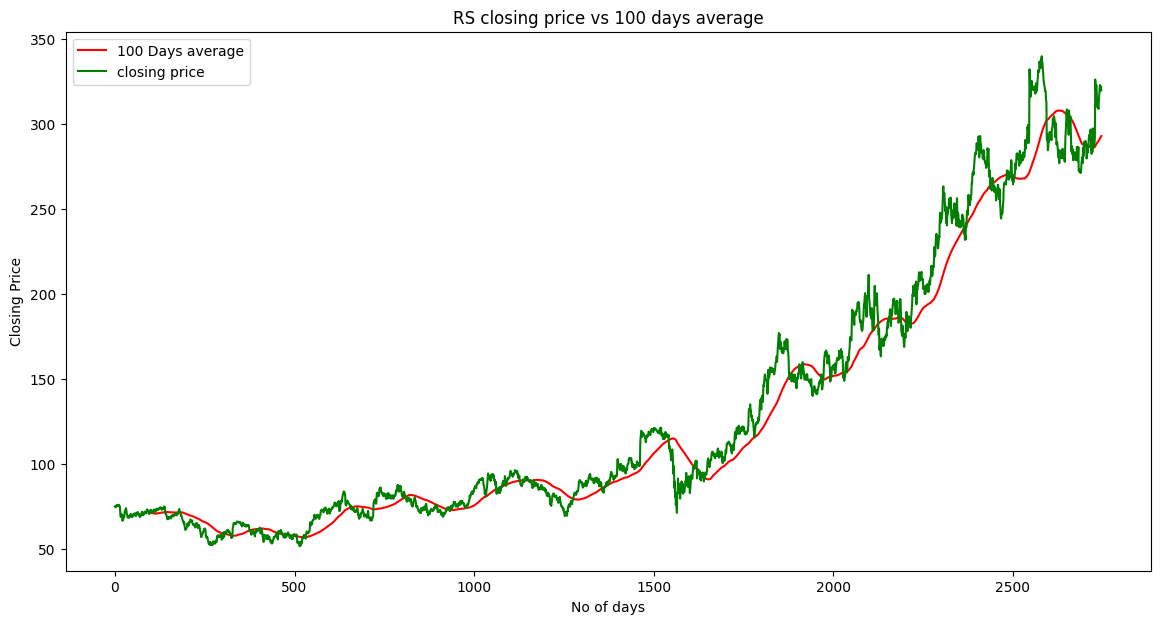

In [ ]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(14,7))
plt.plot(ma_100_days,'r',label="100 Days average")
plt.plot(data.Close,'g',label="closing price")
plt.legend()
plt.xlabel("No of days")
plt.ylabel("Closing Price")
plt.title(f"{stock} closing price vs 100 days average")
plt.show()

***checking with different no of dates***

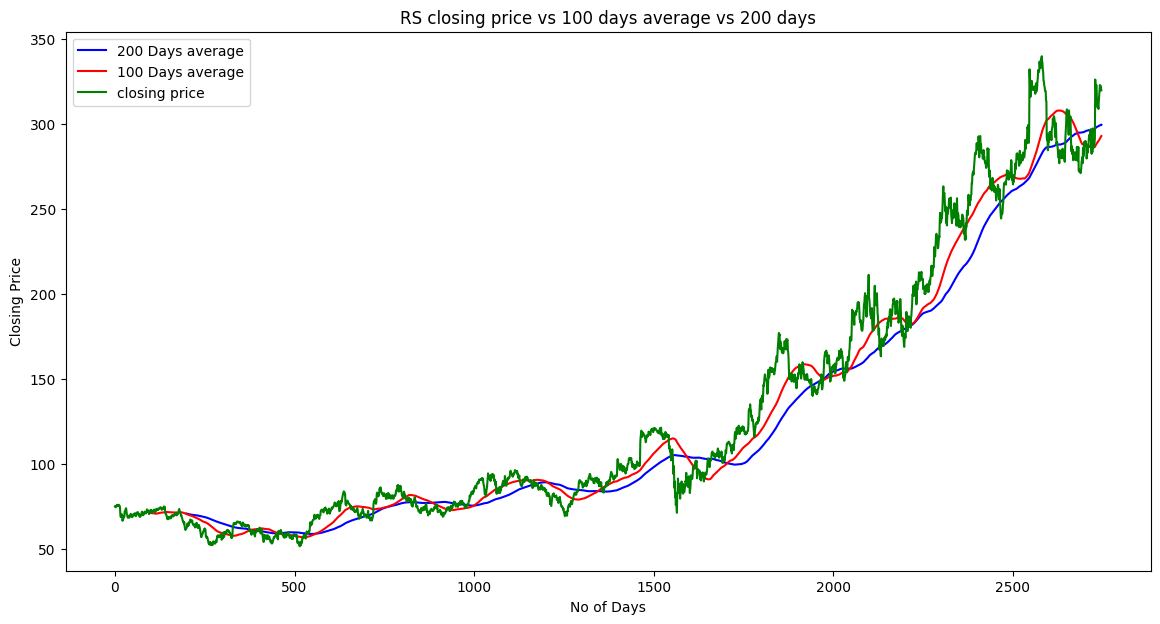

In [ ]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(14,7))
plt.plot(ma_200_days,'b',label="200 Days average")
plt.plot(ma_100_days,'r',label="100 Days average")
plt.plot(data.Close,'g',label='closing price')
plt.legend()
plt.xlabel('No of Days')
plt.ylabel('Closing Price')
plt.title(f'{stock} closing price vs 100 days average vs 200 days')
plt.show()

In [ ]:
data.dropna(inplace=True)
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [ ]:
data_train.shape[0]

2198

In [ ]:
data_test.shape[0]

550

importing sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_array=scaler.fit_transform(data_train)
x=[]
y=[]
for i in range(100,data_train_array.shape[0]):
  x.append(data_train_array[i-100:i])
  y.append(data_train_array[i,0])
x,y=np.array(x),np.array(y)

importing sequential lstm model,dense and dropout from keras

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=30, batch_size=32,verbose =1)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - loss: 0.0512
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0057
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0051
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0047
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0046
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0052
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0036
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0044
Epoch 9/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0033
Epoch 10/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0035
Epoch 11/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0031
Epoch 12/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0033
Epoch 13/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0033
Epoch 14/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0032
Epoch 15/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0036
Ep

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days=data_train.tail(100)
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)
data_test_array=scaler.fit_transform(data_test)
x=[]
y=[]
for i in range(100,data_test.shape[0]):
  x.append(data_train_array[i-100:i])
  y.append(data_train_array[i,0])
x,y=np.array(x),np.array(y)
y_predict=model.predict(x)
scale=1/scaler.scale_
y_predict=y_predict*scale
y=y*scale

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


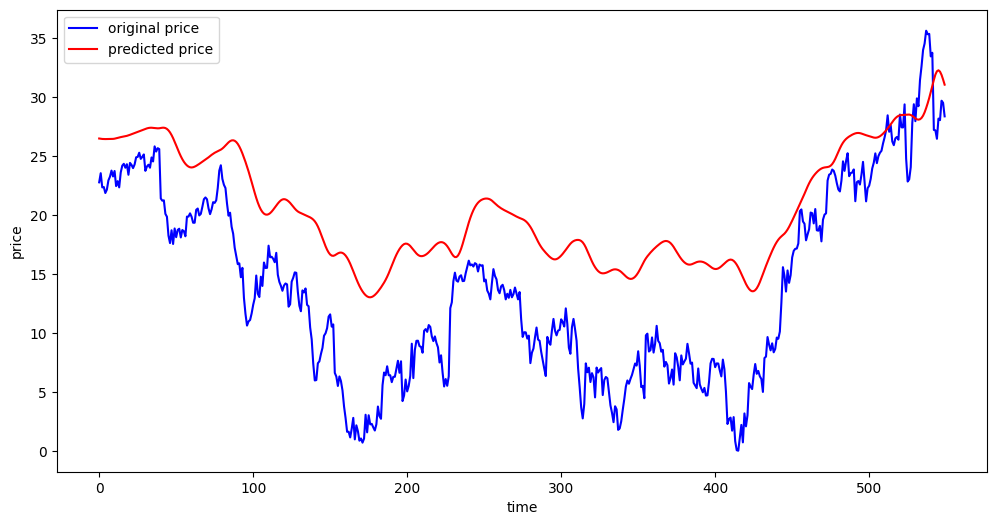

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y,'b',label='original price')
plt.plot(y_predict,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Scale the test set data (30% of total data)
inputs = scaler.transform(data_test.values.reshape(-1, 1))

# Create sequences for predictions based on the test data
X_test = [inputs[i-100:i, 0] for i in range(100, len(inputs))]
X_test = np.array(X_test).reshape(-1, 100, 1)

# Model prediction for test data
predicted_test_price = model.predict(X_test)
predicted_test_price = scaler.inverse_transform(predicted_test_price)

# Calculate MAPE between actual and predicted prices
mape = mean_absolute_percentage_error(data_test.values[100:], predicted_test_price)

# Display accuracy
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Mean Absolute Percentage Error (MAPE): 2.96%


In [ ]:
# Scale the test dataset
inputs = scaler.transform(data_test.values.reshape(-1, 1))

# Prepare the test sequences
X_test = [inputs[i-100:i, 0] for i in range(100, len(inputs))]
X_test = np.array(X_test).reshape(-1, 100, 1)

# Predict on test sequences
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Predict the next 10 days
future_predictions = []
current_batch = inputs[-100:]  # Start with the last observed 100 timesteps
for _ in range(10):
    current_pred = model.predict(current_batch.reshape(1, 100, 1))  # Predict next value
    future_predictions.append(current_pred[0, 0])  # Append the prediction
    current_batch = np.append(current_batch[1:], current_pred, axis=0)  # Update batch

# Transform predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


 5/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
Last_date = data['Date'].iloc[-1].strftime('%Y-%m-%d')
print("Index\tDate\t\tPredicted Price")
for i in range(1,11):
    future_date = datetime.strptime(Last_date, '%Y-%m-%d') + pd.DateOffset(days=i)
    future_date
    print(f"{i}\t{future_date.strftime('%Y-%m-%d')}\t{future_predictions[i-1][0]}")

Index	Date		Predicted Price
1	2024-12-03	308.9906005859375
2	2024-12-04	310.134521484375
3	2024-12-05	310.3231201171875
4	2024-12-06	309.5367736816406
5	2024-12-07	307.9967346191406
6	2024-12-08	306.0245056152344
7	2024-12-09	303.93756103515625
8	2024-12-10	301.982421875
9	2024-12-11	300.3122863769531
10	2024-12-12	298.9918212890625
